In [1]:
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns 

In [4]:
heart = pd.read_csv('heartdata.csv')
heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
heart.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


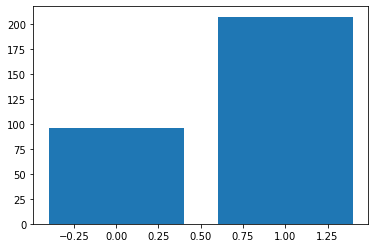

In [6]:
plt.bar(list(heart['sex'].value_counts().keys()),list(heart['sex'].value_counts()))
plt.show()

In [7]:
  heart['cp'].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

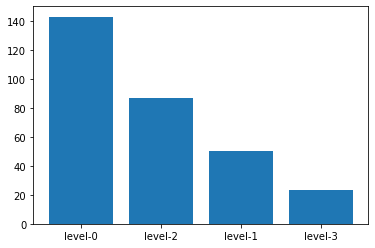

In [8]:
plt.bar(list(("level-0","level-2","level-1","level-3")),list(heart['cp'].value_counts()))
plt.show()

C:\Users\ahpat\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


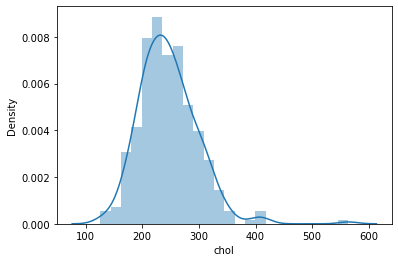

In [9]:
sns.distplot(heart['chol'])
plt.show()

In [11]:
heart['output'].value_counts()

1    165
0    138
Name: output, dtype: int64

<BarContainer object of 2 artists>

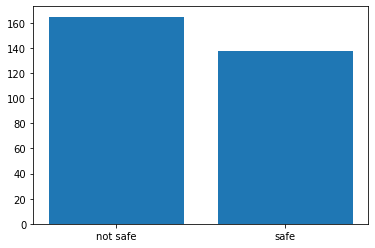

In [13]:
plt.bar(list(("not safe","safe")),list(heart['output'].value_counts()))

In [15]:
x = heart[['age']]
y = heart[['output']]

In [16]:
from sklearn.model_selection import train_test_split

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [24]:
from sklearn.naive_bayes import MultinomialNB

In [26]:
mnb = MultinomialNB()
mnb.fit(x_train,y_train)

C:\Users\ahpat\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB()

In [27]:
y_pred = mnb.predict(x_test)

In [28]:
y_test.head(),y_pred[0:5]

(     output
 76        1
 133       1
 148       1
 297       0
 184       0,
 array([1, 1, 1, 1, 1], dtype=int64))

In [29]:
from sklearn.metrics import confusion_matrix

In [30]:
confusion_matrix(y_test,y_pred)

array([[ 0, 51],
       [ 0, 40]], dtype=int64)

In [32]:
x = heart[['age','trtbps','chol']]

In [33]:
x.head()

,age,trtbps,chol
0,63,145,233
1,37,130,250
2,41,130,204
3,56,120,236
4,57,120,354


In [34]:
y = heart[['output']]

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.4)

In [37]:
from sklearn.naive_bayes import GaussianNB

In [38]:
gnb = GaussianNB()

In [39]:
gnb.fit(x_train,y_train)

C:\Users\ahpat\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [40]:
y_pred = gnb.predict(x_test)
from sklearn.metrics import confusion_matrix

In [41]:
confusion_matrix(y_test,y_pred)

array([[29, 28],
       [18, 47]], dtype=int64)